# Debora: comparing PolyMAC to VDF

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import CoolProp.CoolProp as CP
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import os
from IPython.display import display
from string import Template
import pandas as pd
import matplotlib.cm as cm
import matplotlib as mpl



In [2]:
from trustutils import run 
from trustutils import visit
from trustutils.jupyter import plot

run.TRUST_parameters()

ModuleNotFoundError: No module named 'trustutils'

In [ ]:

# Essai G3Q80 monophasique, G3Q81 diphasique
essais = { "mono" :  { "P": 13.9e5, "G": 3000, "q" : 81e3  , 'Te' : 20.1},
           "mono2D": { "P": 13.9e5, "G": 3000, "q" : 120e3 , 'Te' : 20.1},
            "di" :   { "P": 14.6e5, "G": 2723, "q" : 81.4e3, 'Te' : 44.5},
            "di2D" : { "P": 14.6e5, "G": 2723, "q" : 120e3 , 'Te' : 44.5}
         }

for e in essais.keys() :
    essais[e]["u0"]  = essais[e]["G"]/CP.PropsSI("DMASS", "P", essais[e]["P"], "T", essais[e]["Te"]+273.15, "R134a")
    essais[e]["Tsat"]= CP.PropsSI("T", "P", essais[e]["P"],  "Q", 0, "R134a") - 273.15
    essais[e]["CL_k"]= 0.002*np.array(essais[e]["u0"])**2
    essais[e]["CL_om"]= 0.5*np.array(essais[e]["u0"])/0.0192


In [ ]:
z_sondes   = { "mono" : 4.485 , "mono2D" : 4.485 , "di" : 3.485 , "di2D" : 3.485 }
name_sondes= { "mono" : ["vitesse_liquide_R134A", "temperature_liquide_r134A"],
               "mono2D":["vitesse_liquide_R134A", "temperature_liquide_r134A"],
               "di"   : ["vitesse_liquide_R134A", "vitesse_gaz_R134A", "alpha_gaz_R134A", "temperature_liquide_r134A"],
               "di2D" : ["vitesse_liquide_R134A", "vitesse_gaz_R134A", "alpha_gaz_R134A", "temperature_liquide_r134A"] }
schema     = { "VDF" : " vdf  dis option_vdf { all_options } ", "PolyMAC" : " PolyMAC_P0  dis option_PolyMAC_P0 { traitement_axi } " }
dimension  = { "mono_VDF" : 2, "mono2D_VDF" : 2,  "di_VDF" : 2, "di2D_VDF" : 2, "mono_PolyMAC" : 3, "mono2D_PolyMAC" : 2, "di_PolyMAC" : 3, "di2D_PolyMAC" : 2}
bidim_axi  = { "mono_VDF"       : " bidim_axi ",
               "mono2D_VDF"     : " ",
               "mono2D_PolyMAC" : " ",
               "di_VDF"         : " bidim_axi ",
               "di2D_VDF"       : " ",
               "di2D_PolyMAC"   : " ",
               "mono_PolyMAC"   : " ",
               "di_PolyMAC"     : " "}
med_file   = { "mono_VDF" : "", "mono2D_VDF" : "", "di_VDF" : "", "di2D_VDF" : "", "mono_PolyMAC" : "Debora3.med", "mono2D_PolyMAC" : "", "di_PolyMAC" : "Debora2.med", "di2D_PolyMAC" : "" }
name_mesh  = { "mono_VDF"       : "Mailler dom { Pave tube  { Origine 0. 0. Nombre_de_Noeuds 21 501 Longueurs  0.0096 5. } { bord symetrie    X = 0   0 <= Y <= 5  bord top   Y = 5   0 <= X <= 0.0096  bord bottom    Y = 0   0 <= X <= 0.0096 bord wall_hot   X = 0.0096 1 <= Y <= 4.5 bord wall_cold  X = 0.0096 0 <= Y <= 1 bord wall_cold   X = 0.0096 4.5 <= Y <= 5 } } ",
               "mono2D_VDF"     : "Mailler dom { Pave tube  { Origine 0. 0. Nombre_de_Noeuds 21 501 Longueurs  0.0096 5. } { bord symetrie    X = 0   0 <= Y <= 5  bord top   Y = 5   0 <= X <= 0.0096  bord bottom    Y = 0   0 <= X <= 0.0096 bord wall_hot   X = 0.0096 1 <= Y <= 4.5 bord wall_cold  X = 0.0096 0 <= Y <= 1 bord wall_cold   X = 0.0096 4.5 <= Y <= 5 } } ",
               "mono2D_PolyMAC" : "Mailler dom { Pave tube  { Origine 0. 0. Nombre_de_Noeuds 21 501 Longueurs  0.0096 5. } { bord symetrie    X = 0   0 <= Y <= 5  bord top   Y = 5   0 <= X <= 0.0096  bord bottom    Y = 0   0 <= X <= 0.0096 bord wall_hot   X = 0.0096 1 <= Y <= 4.5 bord wall_cold  X = 0.0096 0 <= Y <= 1 bord wall_cold   X = 0.0096 4.5 <= Y <= 5 } } ",
               "di_VDF"         : "Mailler dom { Pave tube  { Origine 0. 0. Nombre_de_Noeuds 21 401 Longueurs  0.0096 4. } { bord symetrie    X = 0   0 <= Y <= 4  bord top   Y = 4   0 <= X <= 0.0096  bord bottom    Y = 0   0 <= X <= 0.0096 bord wall_hot   X = 0.0096 1 <= Y <= 3.5 bord wall_cold  X = 0.0096 0 <= Y <= 1 bord wall_cold   X = 0.0096 3.5 <= Y <= 4 } } ",
               "di2D_VDF"       : "Mailler dom { Pave tube  { Origine 0. 0. Nombre_de_Noeuds 21 401 Longueurs  0.0096 4. } { bord symetrie    X = 0   0 <= Y <= 4  bord top   Y = 4   0 <= X <= 0.0096  bord bottom    Y = 0   0 <= X <= 0.0096 bord wall_hot   X = 0.0096 1 <= Y <= 3.5 bord wall_cold  X = 0.0096 0 <= Y <= 1 bord wall_cold   X = 0.0096 3.5 <= Y <= 4 } } ",
               "di2D_PolyMAC"   : "Mailler dom { Pave tube  { Origine 0. 0. Nombre_de_Noeuds 21 401 Longueurs  0.0096 4. } { bord symetrie    X = 0   0 <= Y <= 4  bord top   Y = 4   0 <= X <= 0.0096  bord bottom    Y = 0   0 <= X <= 0.0096 bord wall_hot   X = 0.0096 1 <= Y <= 3.5 bord wall_cold  X = 0.0096 0 <= Y <= 1 bord wall_cold   X = 0.0096 3.5 <= Y <= 4 } } " ,
               "mono_PolyMAC" : "read_med { domain dom mesh mesh file Debora3.med }",
               "di_PolyMAC"   : "read_med { domain dom mesh mesh file Debora2.med } "
               }
fluids_template = { "mono" : Template("liquide_r134a Fluide_generique_CoolProp { model $model fluid $liq }"),
                    "mono2D":Template("liquide_r134a Fluide_generique_CoolProp { model $model fluid $liq }"),
                    "di"   : Template("liquide_r134a Fluide_generique_CoolProp { model $model fluid $liq } gaz_r134a Fluide_generique_CoolProp { model $model fluid $vap } saturation_r134a saturation_generique_CoolProp { model $model fluid $sat sigma_mano 0.004999019378771977 }"),
                    "di2D" : Template("liquide_r134a Fluide_generique_CoolProp { model $model fluid $liq } gaz_r134a Fluide_generique_CoolProp { model $model fluid $vap } saturation_r134a saturation_generique_CoolProp { model $model fluid $sat sigma_mano 0.004999019378771977 }")
                  }
models= {
        "liq": "r134a phase liquid",
        "vap": "r134a phase vapor",
        "sat": "r134a phase liquid",
        "models": ["BICUBIC&HEOS"],
        "symbol" : "-"
        }
model = "bicubic&heos"
number_of_partitions = { 'mono_VDF' : 2, 'mono2D_VDF' : 2, 'mono_PolyMAC' : 2, 'mono2D_PolyMAC' : 2,  'di_VDF' : 2, 'di_PolyMAC' : 8, 'di2D_VDF' : 2, 'di2D_PolyMAC' : 2   }
#number_of_partitions = { 'di2D_VDF' : 8, 'di_VDF' : 8   }
#number_of_partitions = { 'mono2D_VDF' : 1, 'di2D_VDF' : 2 }
#number_of_partitions = { 'mono_VDF' : 2  }

corr = { "mono" : "",
         "mono2D" : "",
         "di"   : "flux_interfacial mano frottement_interfacial Ishii_Zuber_Deformable { }  masse_ajoutee coef_constant { beta 0. }  portance_interfaciale constante { Cl -0.03 } dispersion_bulles turbulente_burns { Prt 1. } ",
         "di2D" : "flux_interfacial mano frottement_interfacial Ishii_Zuber_Deformable { }  masse_ajoutee coef_constant { beta 0. }  portance_interfaciale constante { Cl -0.03 } dispersion_bulles turbulente_burns { Prt 1. } "
        }
fp = {"mono" : " adaptatif " , "mono2D" : " adaptatif " , "di" : " kurul_podowski adaptatif { } " , "di2D" : " kurul_podowski adaptatif { } "}
fi = {"mono" : " ", "mono2D" : " ", "di" : " , frottement_interfacial { } , portance_interfaciale { } , Dispersion_bulles { } " , "di2D" : " , frottement_interfacial { } , portance_interfaciale { } , Dispersion_bulles { } " }
fli = { "mono" : " ", "mono2D" : " ", "di" : "flux_interfacial", "di2D" : "flux_interfacial"}
flit = { "mono" : " ", "mono2D" : " ", "di" : ", flux_interfacial", "di2D" : ", flux_interfacial"}

In [ ]:
sondes = {}
n_seg_sonde = 20
r_tube = 0.0096

for e in essais.keys() :
    for s in schema.keys() :
        name = f"{e}_{s}"
        str_sonde = " "
        if dimension[name] == 3 :
            x_0 = r_tube/(2*n_seg_sonde)*np.cos(np.pi*.5/360)
            y_0 = r_tube/(2*n_seg_sonde)*np.sin(np.pi*.5/360)
            x_wall = r_tube*(2*n_seg_sonde-1)/(2*n_seg_sonde)*np.cos(np.pi*.5/360)
            y_wall = r_tube*(2*n_seg_sonde-1)/(2*n_seg_sonde)*np.sin(np.pi*.5/360)
            for name_sonde in name_sondes[e] :
                str_sonde += f" {name_sonde} {name_sonde} periode 1.e-1 segment {n_seg_sonde} {x_0} {y_0} {z_sondes[e]} {x_wall} {y_wall} {z_sondes[e]}  \n"

        elif dimension[name] == 2 :
            for name_sonde in name_sondes[e] :
                str_sonde += f" {name_sonde} {name_sonde} periode 1.e-1 segment {n_seg_sonde} {r_tube/(2*n_seg_sonde)} {z_sondes[e]} {r_tube*(2*n_seg_sonde-1)/(2*n_seg_sonde)} {z_sondes[e]}  \n"

        sondes[name] = str_sonde

In [ ]:
force_recalculation = False 

nb_pas_dt_max = 1

#build_dir = run.BUILD_DIRECTORY
build_dir = "/volatile/catB/cr268029/triocfd/share/Validation/Rapports_automatiques/Multiphase/CMFD/Debora_VDF_PolyMAC/run_man"

if force_recalculation or not os.path.exists('build'):
    run.reset()
    origin = os.getcwd()
    for e in essais.keys() :
        for s in schema.keys() :
            name = f"{e}_{s}"
            if name in number_of_partitions.keys() :          
                fluids = fluids_template[e].substitute({"model": model, "liq": models["liq"], "vap": models["vap"], "sat": models["sat"]})
                if e[:4]=="mono" : a0, T0 = " 1 1 "  , f" 1 {essais[e]['Te']} "
                else             : a0, T0 = " 2 1 0 ", f" 2 {essais[e]['Te']}  {essais[e]['Tsat']} "
                if e[:4]=="mono" : u0 = f"{dimension[name]} {''.join([ ' 0 ' for i in range((dimension[name]-1))])} {essais[e]['u0']}"
                else             : u0 = f"{2*dimension[name]} {''.join([ ' 0 ' for i in range(2*(dimension[name]-1))])} {essais[e]['u0']} {essais[e]['u0']}"
                if e[:4]=="mono" : grav = f"{dimension[name]} {''.join([ ' 0 ' for i in range((dimension[name]-1))])} -9.81 "
                else             : grav = f"{2*dimension[name]} {''.join([ ' 0 ' for i in range(2*(dimension[name]-1))])} -9.81  -9.81 "
                dict_substitute = {"dim" : dimension[name],
                                   "dis" : schema[s],
                                   "bidim_axi" : bidim_axi[name],
                                    "fluids": fluids,
                                    "u_0"  : u0,
                                    "k0" : essais[e]["CL_k"] ,
                                    "om0": essais[e]["CL_om"] ,
                                    "P_surf" : f"{essais[e]['q']}*(t_MIN_1)",
                                    "T0" : T0,
                                    "a0" : a0,
                                    "P0"  : essais[e]["P"],
                                    "mesh" : name_mesh[name],
                                    "sondes" : sondes[name],
                                    "nb_pas_dt_max" : nb_pas_dt_max,
                                    "tmax" : 4,
                                    "flux_parietal" : fp[e],
                                    "corr" : corr[e],
                                    "fi" : fi[e],
                                    "fli" : fli[e],
                                    "flit" : flit[e],
                                    "grav" : grav 
                                }

                tc = run.addCaseFromTemplate(templateData=f"jdd.data",targetDirectory=f"{name}",dic=dict_substitute,nbProcs=number_of_partitions[name],targetData=f"{name}.data")

                if (med_file[name]!=""):
                    os.system(f'cp {build_dir}/{med_file[name]} {build_dir}/{name}/{med_file[name]}')

                if number_of_partitions[name] > 1:
                    tc.partition()

    run.printCases()
    run.runCases()
#    display(run.tablePerf())
else:
    print('No recalculation, reusing old results!')

No recalculation, reusing old results!


mono_VDF
[b'Statistiques', b"d'initialisation", b'du', b'calcul', b'Temps', b'total', b'3.00686', b'Statistiques', b'de', b'resolution', b'du', b'probleme', b'Temps', b'total', b'2375.82', b'Timesteps', b'8396', b'Secondes', b'/', b'pas', b'de', b'temps', b'0.282969', b'Dont', b'solveurs', b'Ax=B', b'0.068025', b'24%', b'(1.49', b'appels/pas', b'de', b'temps)', b'Dont', b'assemblage', b'matrice_implicite', b'0.010969', b'3%', b'(10.4032', b'appels/pas', b'de', b'temps)', b'Dont', b'mettre_a_jour', b'0.046993', b'16%', b'(1', b'appel/pas', b'de', b'temps)', b'Dont', b'operateurs', b'convection', b'0.002869', b'1%', b'(10.4032', b'appels/pas', b'de', b'temps)', b'Dont', b'operateurs', b'diffusion', b'0.004748', b'1%', b'(8.32253', b'appels/pas', b'de', b'temps)', b'Dont', b'operateurs', b'gradient', b'0.001501', b'0%', b'(11.3225', b'appels/pas', b'de', b'temps)', b'Dont', b'operateurs', b'source', b'0.007586', b'2%', b'(10.4032', b'appels/pas', b'de', b'temps)', b'Dont', b'operations', 

NameError: name 'plot' is not defined

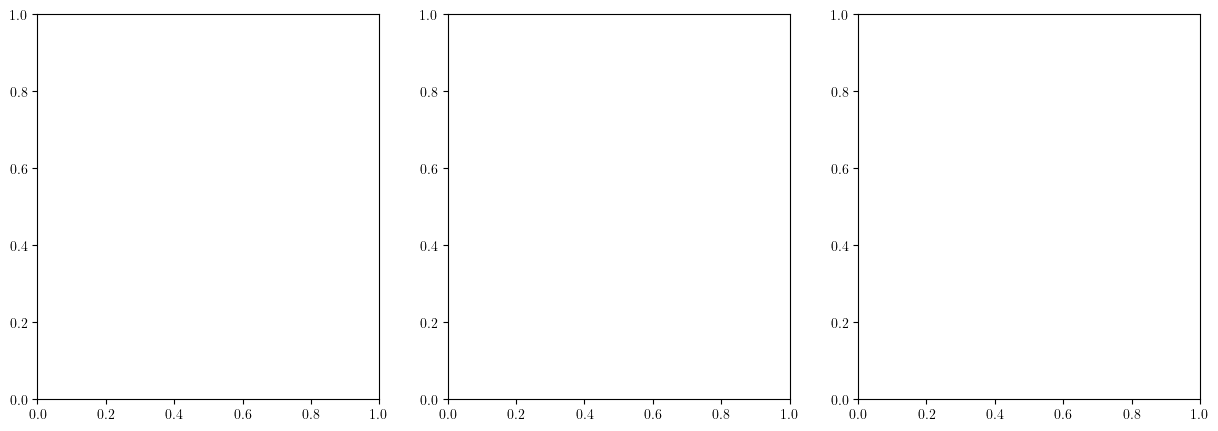

In [ ]:
color_e  = { "mono" : "red", "mono2D" : "magenta", "di" : "green", "di2D" : "blue" }
marker_s =  { "VDF" : "-", "PolyMAC" : "--"}
linesize_s =  { "VDF" : 1, "PolyMAC" : 2}

fig = plt.figure(figsize = (15, 5))
axs = fig.subplots(1, 3)
p_mono = ["vitl", "alphal", "Tl"]
p_di = [["vitl","vitg"], ["alphal", "alphag"], ["Tl","Tg"]]
for e in essais.keys() :
    for s in schema.keys() :
        name = f"{e}_{s}"
        print(name)
        if name in number_of_partitions.keys() :
            par = ""
            if number_of_partitions[name] > 1 : par = "PAR_"

            f_TU = os.open(f"{build_dir}/{name}/{par}{name}.TU", os.O_RDONLY)
            f_TU2 = os.read(f_TU, 1000)
            spltu = f_TU2.split()
            print(spltu)
            time_loc = spltu[14][:8]
            time_steps = int(spltu[16])

            dt_ev = plot.read_csv(f"{build_dir}/{name}/{par}{name}.dt_ev", sep="\t")

            if e[:4]=="mono" :
                dt_ev = dt_ev.iloc[:,:8]
                dt_ev.columns = ['time', 'dt', 'facsec', 'residu', 'dt_stab', 'vitl', 'alphal', 'Tl']
                for l in range(len(p_mono)):
                    pl = p_mono[l]
                    axs[l].plot(dt_ev["time"][::100], dt_ev[pl][::100], marker_s[s], label = name.replace("_", " ") + f' {time_loc}min*proc calc', color = color_e[e], linewidth = linesize_s[s])

            else :
                dt_ev = dt_ev.iloc[:,:13]
                dt_ev.columns = ['time', 'dt', 'facsec', 'residu', 'dt_stab', 'vitl', 'vitg', 'alphal', 'alphag', 'Tl', 'Tg', 'diss', 'k']     
                for l in range(len(p_di)):
                    for pl in p_di[l]:
                        axs[l].plot(dt_ev["time"][::100], dt_ev[pl][::100], marker_s[s], label = name.replace("_", " "), color = color_e[e], linewidth = linesize_s[s])
        
for l in range(3) :
    axs[l].set_xlim(0,4)
    axs[l].set_ylim(1.e-4, 1e4)
    axs[l].set_yscale("log")
    axs[l].set_title("convergence "+p_mono[l] )
    axs[l].set_xlabel('time')
    axs[l].set_ylabel("convergence " + p_mono[l])
    axs[l].legend(prop={'size': 10})

fig.tight_layout()


In [ ]:
t_mesure=-1
nPoints=20
absc = np.linspace(1/(2*nPoints), 1-1/(2*nPoints), 20)

fig = plt.figure(figsize = (20, 20))
axs = fig.subplots(4, 4)
col_e = { "mono" : 0, "mono2D" : 1, "di" : 2, "di2D" : 3 }

for e in essais.keys() :
    c = col_e[e]
    title = f"{e} configuration"
    for s in schema.keys() :
        name = f"{e}_{s}"
        if name in number_of_partitions.keys() :
            par = ""
            if number_of_partitions[name] > 1 : par = "PAR_"

            f_TU = os.open(f"{build_dir}/{name}/{par}{name}.TU", os.O_RDONLY)
            f_TU2 = os.read(f_TU, 1000)
            spltu = f_TU2.split()
            time_loc = spltu[14][:8]
            time_steps = int(spltu[16])

            title += f"\n {s} {time_loc}min*proc calc"

            tl  = np.array(plot.loadText(f"{build_dir}/{name}/{par}{name}_TEMPERATURE_LIQUIDE_R134A.son"))[1::,-1]
            ulr = np.array(plot.loadText(f"{build_dir}/{name}/{par}{name}_VITESSE_LIQUIDE_R134A.son"))[1::dimension[name],-1]
            ulz = np.array(plot.loadText(f"{build_dir}/{name}/{par}{name}_VITESSE_LIQUIDE_R134A.son"))[dimension[name]::dimension[name],-1]
            axs[1,c].plot(absc, tl,  marker_s[s], label = f"Tliq {s.replace('_',' ')}", color = "r", linewidth = linesize_s[s])
            axs[2,c].plot(absc, ulz, marker_s[s], label = f"Ulz {s.replace('_',' ')}" , color = "r", linewidth = linesize_s[s])
            axs[3,c].plot(absc, ulr, marker_s[s], label = f"Ulr {s.replace('_',' ')}" , color = "r", linewidth = linesize_s[s])
            
            if e[:4]!="mono" :
                ugr = np.array(plot.loadText(f"{build_dir}/{name}/{par}{name}_VITESSE_GAZ_R134A.son"))[1::dimension[name],-1]
                ugz = np.array(plot.loadText(f"{build_dir}/{name}/{par}{name}_VITESSE_GAZ_R134A.son"))[dimension[name]::dimension[name],-1]
                alp = np.array(plot.loadText(f"{build_dir}/{name}/{par}{name}_ALPHA_GAZ_R134A.son"))[1::,-1]
                axs[0,c].plot(absc, alp, marker_s[s], label = f"Alpha {s.replace('_',' ')}", color = "r", linewidth = linesize_s[s])
                axs[2,c].plot(absc, ugz, marker_s[s], label = f"Ugz {s.replace('_',' ')}"  , color = "b", linewidth = linesize_s[s])
                axs[3,c].plot(absc, ugr, marker_s[s], label = f"Ugr {s.replace('_',' ')}"  , color = "b", linewidth = linesize_s[s])

    axs[0,c].set_title(title)

for c in range(4) :
    for p in range(4) :
        axs[p,c].set_xlim(0,1)
        axs[p,c].set_xlabel("R+")
        axs[p,c].legend()
    axs[0,c].set_ylabel("Void fraction")
    axs[1,c].set_ylabel("Liquid temperature")
    axs[2,c].set_ylabel("Axial velocity")
    axs[3,c].set_ylabel("Radial velocity")
        
fig.tight_layout()


In [ ]:
t_mesure=-1
nPoints=20
absc = np.linspace(1/(2*nPoints), 1-1/(2*nPoints), 20)

fig = plt.figure(figsize = (10, 5))
axs = fig.subplots(2, 4)
col_e = { "di" : 0, "di2D" : 2 }

essais = {  "di" :   { "P": 14.6e5, "G": 2723, "q" : 81.4e3, 'Te' : 44.5},
            "di2D" : { "P": 14.6e5, "G": 2723, "q" : 120e3 , 'Te' : 44.5}
         }

color_schema = { "VDF" :  "red",
                 "VDF2" :  "orange",
                 "PolyMAC"  : "blue" ,
                 "PolyMAC2" : "chartreuse" 
               }

zorder_schema = { "VDF" : 10, "PolyMAC"  : 5 }


for e in essais.keys() :
    c = col_e[e]
    for s in schema.keys() :
        name = f"{e}_{s}"
        if name in number_of_partitions.keys() :
            par = ""
            if number_of_partitions[name] > 1 : par = "PAR_"

            f_TU = os.open(f"{build_dir}/{name}/{par}{name}.TU", os.O_RDONLY)
            f_TU2 = os.read(f_TU, 1000)
            spltu = f_TU2.split()
            time_loc = spltu[14][:8]
            time_steps = int(spltu[16])

            tl  = np.array(plot.loadText(f"{build_dir}/{name}/{par}{name}_TEMPERATURE_LIQUIDE_R134A.son"))[1::,-1]
            ulr = np.array(plot.loadText(f"{build_dir}/{name}/{par}{name}_VITESSE_LIQUIDE_R134A.son"))[1::dimension[name],-1]
            ulz = np.array(plot.loadText(f"{build_dir}/{name}/{par}{name}_VITESSE_LIQUIDE_R134A.son"))[dimension[name]::dimension[name],-1]
            axs[0,c+1].plot(absc, tl,  marker_s[s], label = r"$T_l$" + f" {s.replace('_',' ')}", color = color_schema[s], linewidth = linesize_s[s], zorder = zorder_schema[s])
            axs[1,c].plot(absc, ulz, marker_s[s], label = r"$u_{lz}$" + f" {s.replace('_',' ')}" , color = color_schema[s], linewidth = linesize_s[s], zorder = zorder_schema[s])
            axs[1,c+1].plot(absc, ulr, marker_s[s], label = r"$u_{lr}$" + f" {s.replace('_',' ')}" , color = color_schema[s], linewidth = linesize_s[s], zorder = zorder_schema[s])
            
            if e[:4]!="mono" :
                ugr = np.array(plot.loadText(f"{build_dir}/{name}/{par}{name}_VITESSE_GAZ_R134A.son"))[1::dimension[name],-1]
                ugz = np.array(plot.loadText(f"{build_dir}/{name}/{par}{name}_VITESSE_GAZ_R134A.son"))[dimension[name]::dimension[name],-1]
                alp = np.array(plot.loadText(f"{build_dir}/{name}/{par}{name}_ALPHA_GAZ_R134A.son"))[1::,-1]
                axs[0,c].plot(absc, alp, marker_s[s], label = r"$\alpha_g$" + f" {s.replace('_',' ')}", color = color_schema[s], linewidth = linesize_s[s], zorder = zorder_schema[s])
                axs[1,c].plot(absc, ugz, marker_s[s], label = r"$u_{gz}$" + f" {s.replace('_',' ')}"  , color = color_schema[s+"2"], linewidth = linesize_s[s], zorder = zorder_schema[s])
                axs[1,c+1].plot(absc, ugr, marker_s[s], label = r"$u_{gr}$" + f" {s.replace('_',' ')}"  , color = color_schema[s+"2"], linewidth = linesize_s[s], zorder = zorder_schema[s])

for c in range(2) :
    for i in range(2) :
        for p in range(2) :
            axs[p,2*c+i].set_xlim(0,1)
            axs[p,2*c+i].set_xlabel("r+")
        axs[0,2*c+i].legend(loc = "upper left", fontsize = 8).set_zorder(20)
        axs[1,2*c+i].legend(loc = "lower left", fontsize = 8).set_zorder(20)
    axs[0,2*c].set_ylabel("Void fraction")
    axs[0,2*c].set_ylim(0,.4)
    axs[0,2*c+1].set_ylabel("Liquid temperature (C)")
    axs[1,2*c].set_ylabel("Axial velocity (m/s)")
    axs[1,2*c+1].set_ylabel("Radial velocity (m/s)")
        
fig.tight_layout()

from matplotlib.gridspec import SubplotSpec

def create_subtitle(fig: plt.Figure, grid: SubplotSpec, title: str):
    "Sign sets of subplots with title"
    row = fig.add_subplot(grid)
    # the '\n' is important
    row.set_title(f'{title}\n', fontweight='semibold')
    # hide subplot
    row.set_frame_on(False)
    row.axis('off')

grid = plt.GridSpec(2, 4)
create_subtitle(fig, grid[0, 0:2], 'Pipe geometry')
create_subtitle(fig, grid[0, 2:4], 'Channel geometry')
fig.tight_layout()
fig.set_facecolor('w')

fig.savefig("Debora_VDF_PolyMAC_SNAMC.pdf")